In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [17]:
df = pd.read_stata("HCMST 2017 fresh sample for public sharing draft v1.1.dta")

In [18]:
for i,name in enumerate(df.columns):
    if df[name].dtypes == 'category':
        df[name] = df[name].astype('str')
        for j,nam in enumerate(df[name].unique()):
            df[name] = df[name].mask(df[name]==nam, j)

In [19]:
for i,name in enumerate(df.columns):
    if df[name].isna().unique().sum() == 1:
        del df[name]

In [20]:
for i,name in enumerate(df.columns):
    print(name)

CaseID
CASEID_NEW
qflag
weight_combo
weight_combo_freqwt
duration
speed_flag
consent
xlgb
S1
S2
S3
DOV_Branch
Q3_Refused
Q4
Q5
Q6A
Q6B
Q9
Q10
Q11
Q12
Q14
Q15A7
Q16_Refused
Q17A
Q17B
Q17C
Q17D
Q19
Q20
Q21A_Year
Q21A_Month
Q21B_Year
Q21B_Month
Q21C_Year
Q21C_Month
Q21D_Year
Q21D_Month
w6_identity
w6_outness
w6_outness_timing
Q23
Q24_Refused
Q25
Q26
Q27
Q28
w6_friend_connect_1
w6_friend_connect_2
w6_friend_connect_3
w6_friend_connect_4
w6_friend_connect_Refused
Q32
Q34
Q35_Refused
w6_sex_frequency
w6_otherdate
w6_how_many
w6_how_meet_Refused
w6_otherdate_app
w6_how_many_app
Past_Partner_Q1
w6_relationship_end_nonmar
w6_breakup_nonmar
w6_relationship_end_mar
w6_who_breakup
Q5_2
Q6A_2
Q9B_2
Q10_2
Q11_2
Q12_2
Q14_2
Q15A7_2_1
Q16_2
Q16_2_Codes
Q17B_2
Q17C_2
Q17D_2
Q20_2
Q21A_2_Year
Q21A_2_Month
Q21B_2_Year
Q21B_2_Month
Q21C_2_Year
Q21C_2_Month
Q21D_2_Year
Q21D_2_Month
Q21E_2_Year
Q21E_2_Month
Q21F_2_start_range
Q21F_2_Year
Q21F_2_Month
w6_identity_2
w6_outness_2
w6_outness_timing_2
Q23_2
Q25_

In [21]:
df.drop(columns=['CaseID','CASEID_NEW'])

,qflag,weight_combo,weight_combo_freqwt,duration,speed_flag,consent,xlgb,S1,S2,S3,...,hcm2017q24_work_neighbors,hcm2017q24_met_online,w6_relationship_quality,hcm2017q24_met_through_family,hcm2017q24_met_through_friend,hcm2017q24_met_through_as_nghbrs,hcm2017q24_met_as_through_cowork,w6_subject_race,interracial_5cat,subject_yrsed
0,0,0.277188,19240.0,9,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,14.0
1,0,1.020621,70841.0,11,0,0,1,1,1,1,...,0,1,1,0,0,0,1,0,0,17.0
2,0,0.810074,56227.0,7,0,0,1,1,1,1,...,0,0,2,0,0,0,0,0,0,17.0
3,0,0.418556,29052.0,5,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,12.0
4,0,0.976522,67781.0,13,0,0,1,1,1,1,...,0,1,1,0,0,1,0,0,0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3505,0,0.200276,13901.0,5,0,0,0,1,1,1,...,0,0,1,0,0,0,0,0,0,17.0
3506,0,0.367395,25501.0,3,0,0,0,0,3,1,...,0,0,2,2,1,0,0,0,0,16.0
3507,0,0.239352,16613.0,8,0,0,0,1,1,1,...,0,0,2,0,0,0,0,0,2,16.0
3508,0,0.188469,13082.0,7,0,0,0,0,2,1,...,0,0,2,0,0,0,0,0,2,17.0


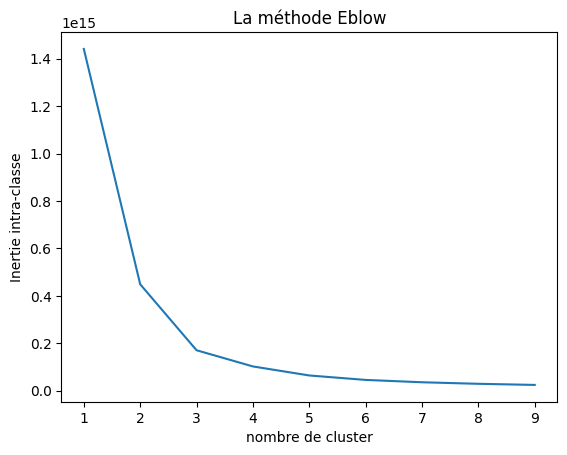

In [22]:
tab=[]
for i in range(1,10):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df)
    tab.append(kmeans.inertia_)
plt.plot(range(1,10),tab)
plt.title("La méthode Eblow")
plt.xlabel("nombre de cluster")
plt.ylabel("Inertie intra-classe")
plt.show()

In [23]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df.drop(columns=['CaseID','CASEID_NEW']))

KMeans(n_clusters=3)

In [24]:
tab = []
for i in kmeans.labels_:
    if i not in tab:
        tab.append(i)
print(tab)

[1, 0, 2]


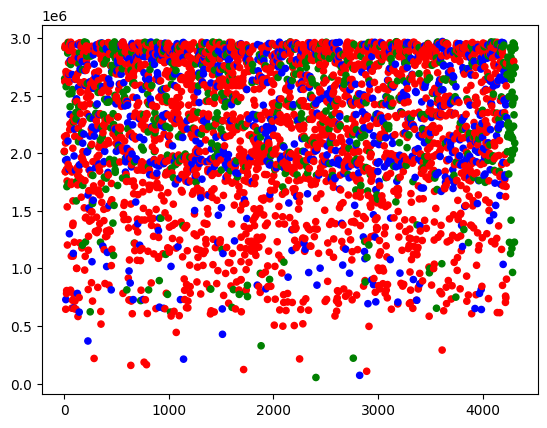

In [26]:
colormap=np.array(["red", "green", "blue"])
plt.scatter(df.CaseID, df.CASEID_NEW, c=colormap[kmeans.labels_], s=20)
plt.show()